# Exception handling
         
        Constrain -- > Only spiral input should be accepted

5


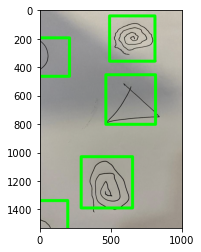

In [118]:
import cv2 
import pyfiglet
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model, model_from_json

cur_dir = os.getcwd()
img_path = ('/Users/mahimairaja/Desktop/tri.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cascade = cv2.CascadeClassifier('cascade.xml')

frame = img
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

spiral_box = cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=100,
    minSize=(50, 50),
    flags=cv2.CASCADE_SCALE_IMAGE )

for (x, y, w, h) in spiral_box:
    cv2.rectangle(frame, 
                  (x-w, y-h), 
                  (x+2*w,y+2*h), 
                  (0, 255, 0),  
                   20)

    
    plt.imshow(frame)
print(len(spiral_box))
    

In [132]:
import cv2 
import pyfiglet
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model, model_from_json
# from skimage import feature

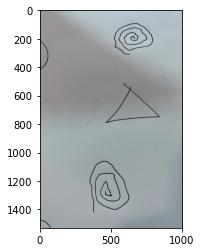

In [148]:
cur_dir = os.getcwd()
img_path = ('/Users/mahimairaja/Desktop/tri.png')

img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

def quantify_image(image):
    # compute the histogram of oriented gradients feature vector for
    # the input image
    features = feature.hog(image, orientations=9,
                           pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")

    # return the feature vector
    return features

5


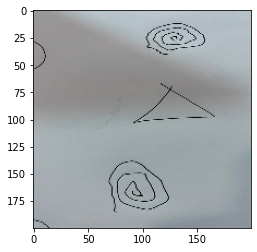

In [149]:
cascade = cv2.CascadeClassifier('cascade.xml')

frame = img
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# resize = tf.image.resize(img, (256,256))

spiral_box = cascade.detectMultiScale(
    frame,
    scaleFactor=1.3,
    minNeighbors=100,
    minSize=(50, 50),
    flags=cv2.CASCADE_SCALE_IMAGE )

# image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(img, (200, 200))
# image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # quantify the image and make predictions based on the extracted features
# features = quantify_image(image)

for (x, y, w, h) in spiral_box:
    cv2.rectangle(image, 
                  (x, y), 
                  (x+w,y+h), 
                  (0, 255, 0),  
                   6)
    

    
    plt.imshow(image)
print(len(spiral_box))
    

In [90]:
! ls models/model2

model_structure.json model_weights.h5


In [92]:
json_file = open('models/model2/model_structure.json','r')
model_structure = json_file.read()
json_file.close()

model = model_from_json(model_structure)

model.load_weights('models/model2/model_weights.h5')

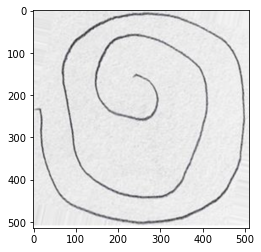

In [150]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/jsdf.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# (thresh, img) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

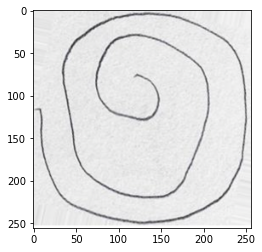

In [151]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [154]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.20112815]]


In [155]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy
